<a href="https://colab.research.google.com/github/hongqin/DPGR_sandbox/blob/main/DPGR_mixed_pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fixed parameter values simjulation

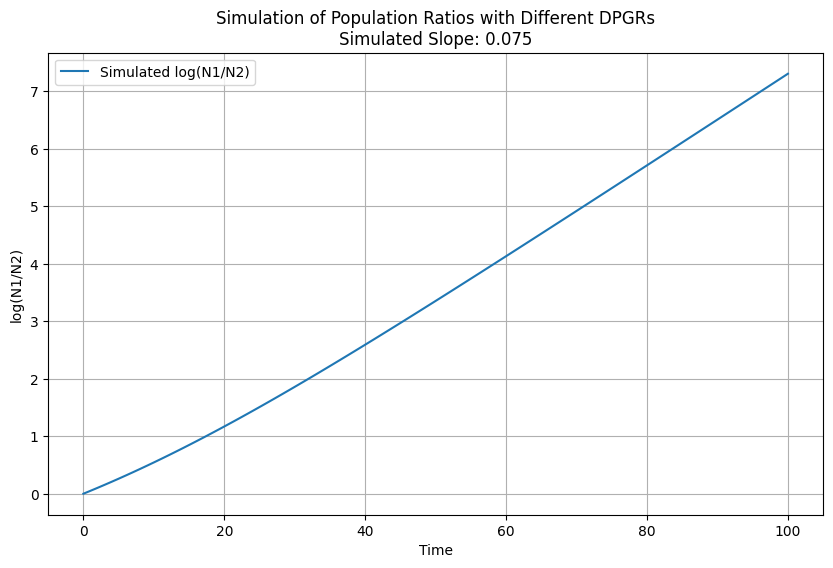

(0.07469766165043336, 0.1)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters, variant 1 and 2, region a and b.
# Variant 1 grow fasters than variant 2
dpgr_1a_2a = 0.02 #region a
dpgr_1b_2b = 0.08 #region b
g2a = 0.3
g2b = 0.3
g1a = g2a + dpgr_1a_2a
g1b = g2b + dpgr_1b_2b

initial_N1a = 100
initial_N1b = 100
initial_N2a = 100
initial_N2b = 100
time_points = np.linspace(0, 100, 100)  # Simulate over 10 time units

# Define population growth functions
def population_growth(N0, g, t):
    return N0 * np.exp(g * t)

# Initialize arrays to store results
N1a = np.zeros_like(time_points)
N1b = np.zeros_like(time_points)
N2a = np.zeros_like(time_points)
N2b = np.zeros_like(time_points)
N1 = np.zeros_like(time_points)
N2 = np.zeros_like(time_points)
log_ratio_N1_N2 = np.zeros_like(time_points)
expected_log_ratio_N1_N2 = np.zeros_like(time_points)

# Simulate population growth
for i, t in enumerate(time_points):
    N1a[i] = population_growth(initial_N1a, g1a, t)
    N1b[i] = population_growth(initial_N1b, g1b, t)
    N2a[i] = population_growth(initial_N2a, g2a, t)
    N2b[i] = population_growth(initial_N2b, g2b, t)
    N1[i] = N1a[i] + N1b[i]
    N2[i] = N2a[i] + N2b[i]
    log_ratio_N1_N2[i] = np.log(N1[i] / N2[i])
#    expected_log_ratio_N1_N2[i] = (0.5 * dpgr_1a_2a + 0.5 * dpgr_1b_2b) * t

# Calculate slopes
simulated_slope, _ = np.polyfit(time_points, log_ratio_N1_N2, 1)
#expected_slope = 0.5 * dpgr_1a_2a + 0.5 * dpgr_1b_2b

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_points, log_ratio_N1_N2, label='Simulated log(N1/N2)')
#plt.plot(time_points, expected_log_ratio_N1_N2, label='Additive Expected log(N1/N2)', linestyle='--') #if additive happens, but this turns out to be not the case.
plt.xlabel('Time')
plt.ylabel('log(N1/N2)')
#plt.title(f'Simulation of Population Ratios with Different DPGRs\nSimulated Slope: {simulated_slope:.3f}, Expected Slope: {expected_slope:.3f}')
plt.title(f'Simulation of Population Ratios with Different DPGRs\nSimulated Slope: {simulated_slope:.3f}')
plt.legend()
plt.grid(True)
plt.show()

simulated_slope, expected_slope

Conclusion: Simulaation show that fast growth will dominate with slow growth in the long run.

# gpt 4, short time window

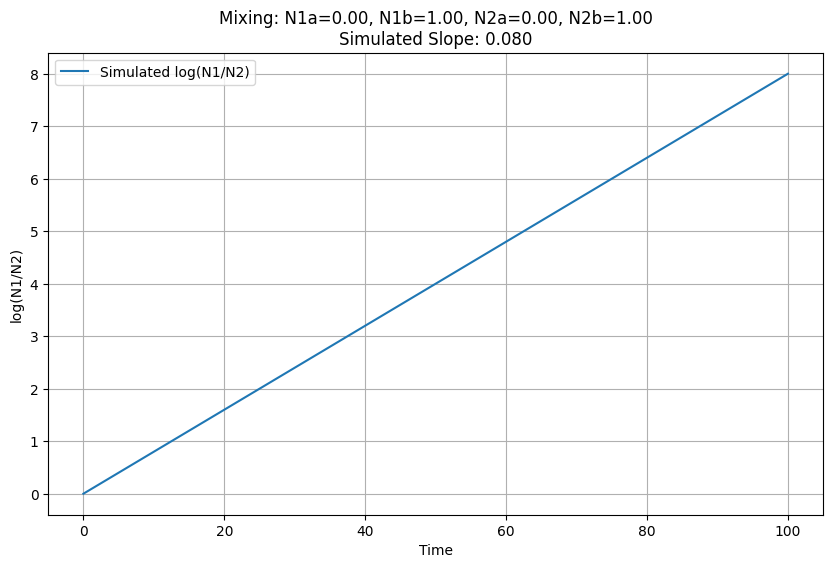

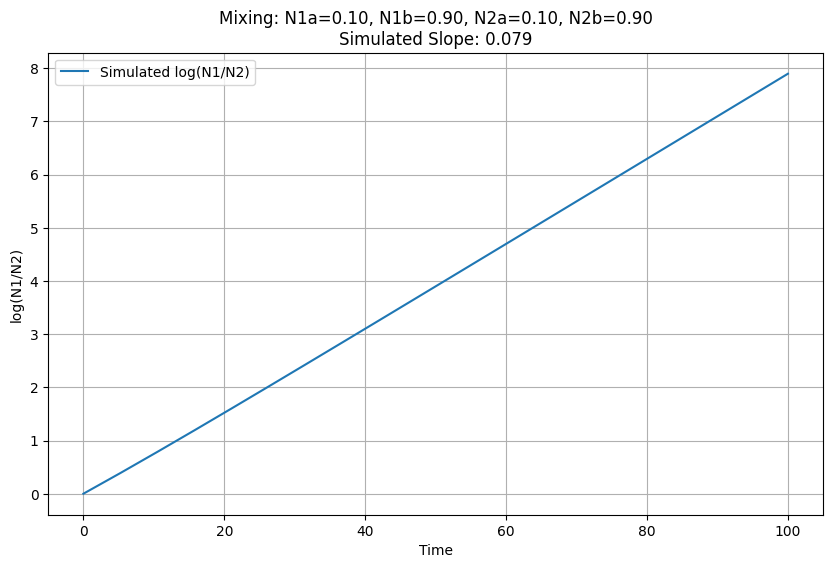

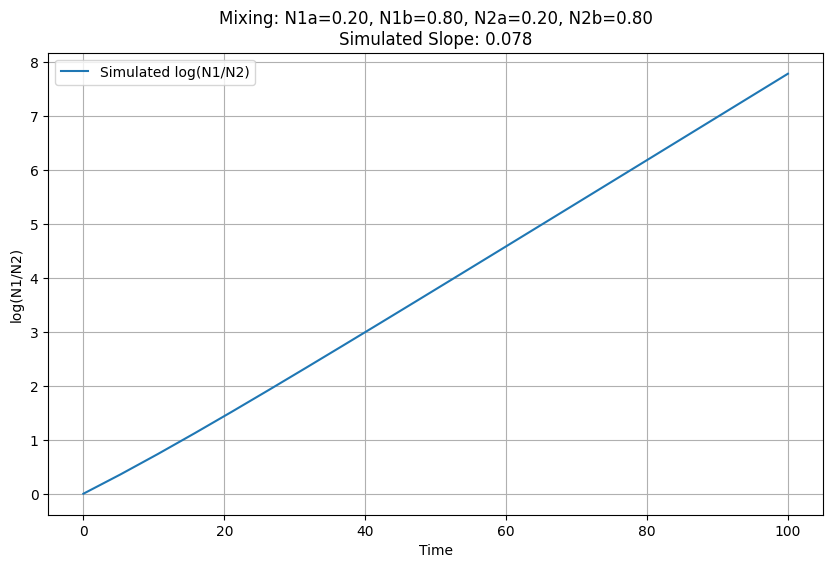

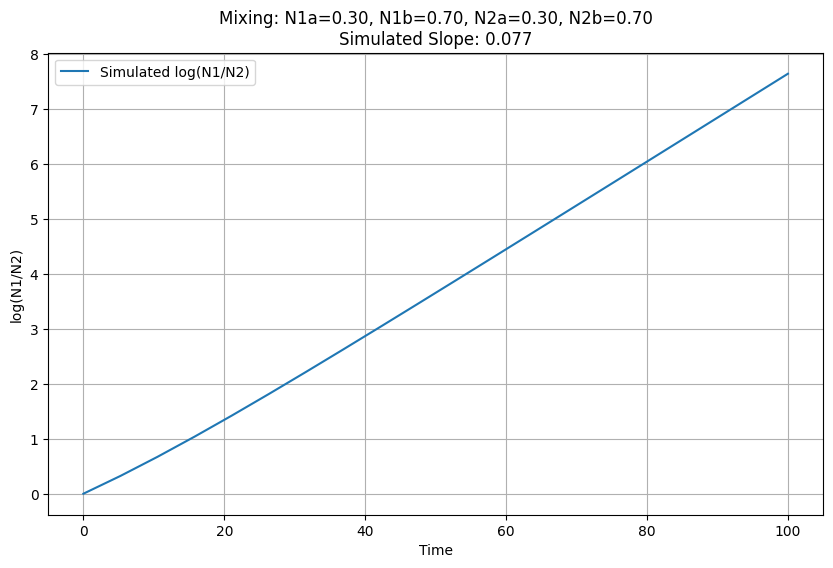

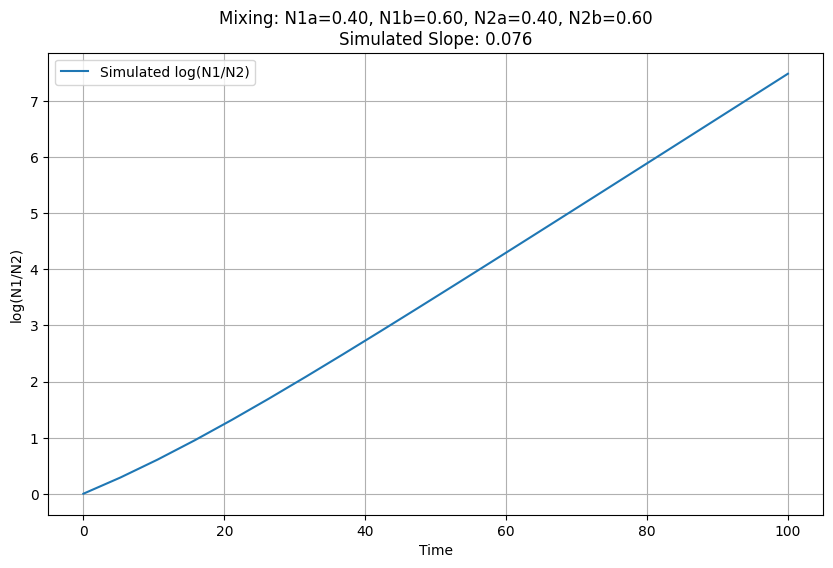

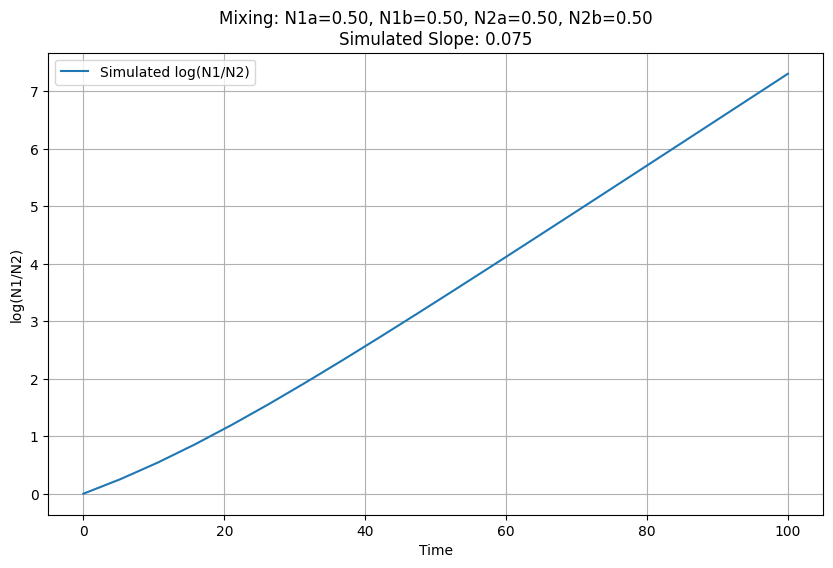

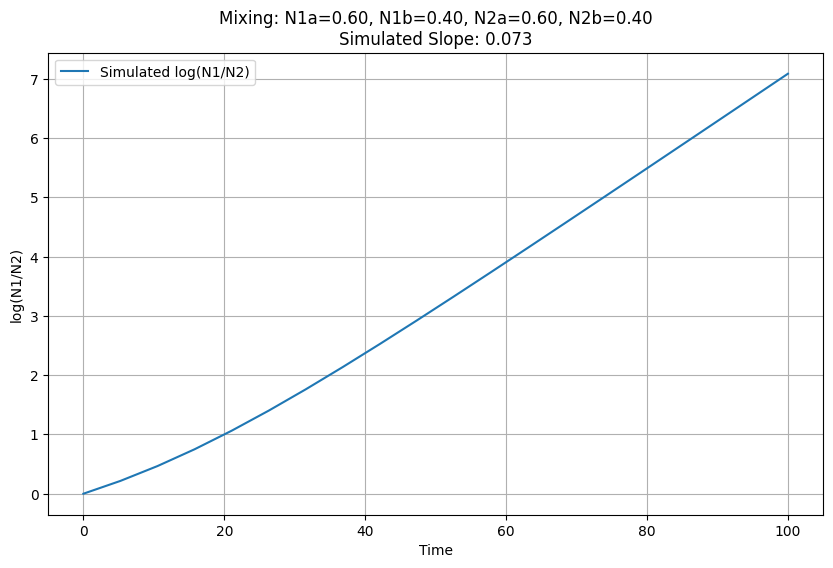

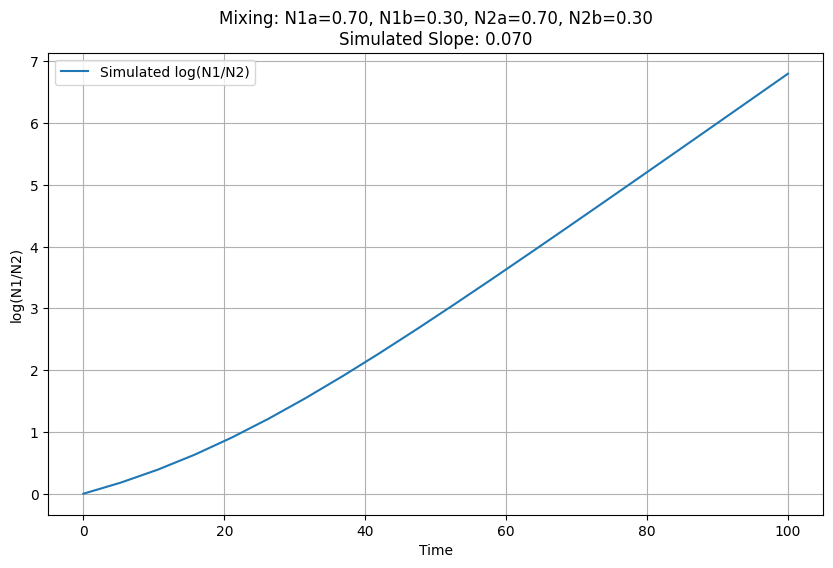

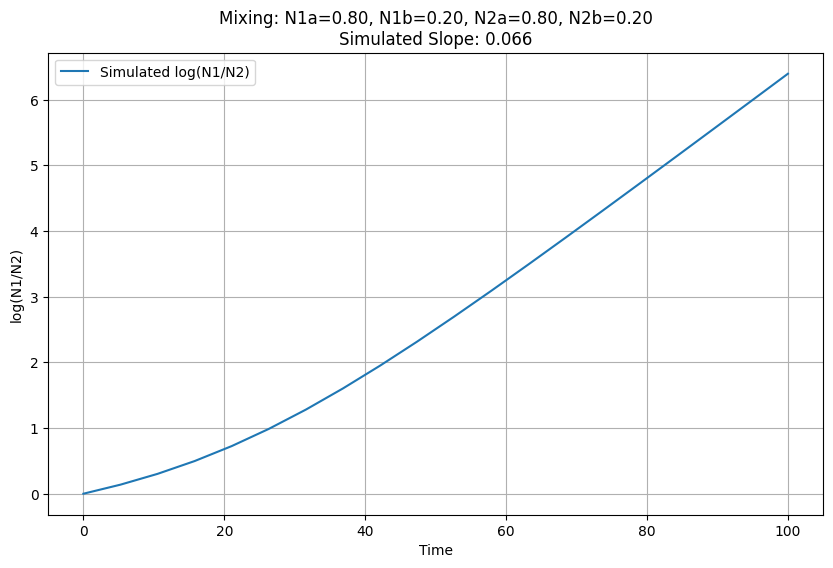

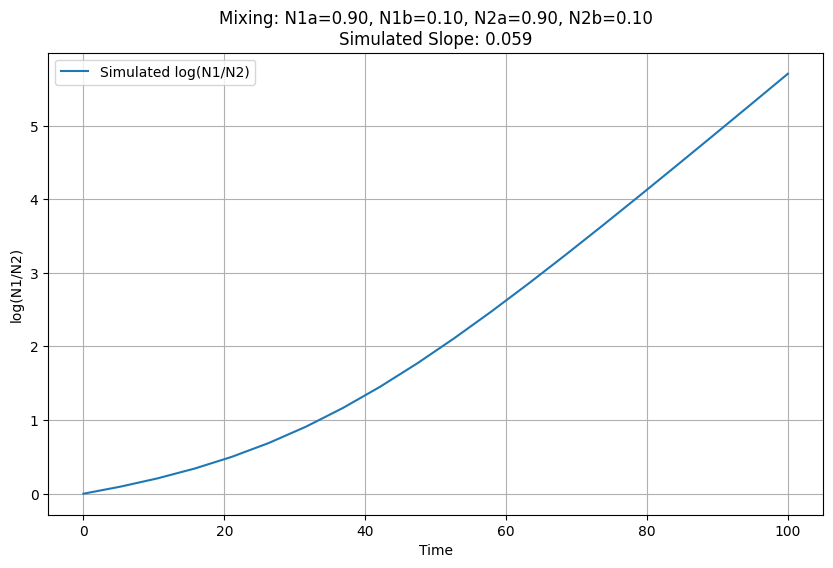

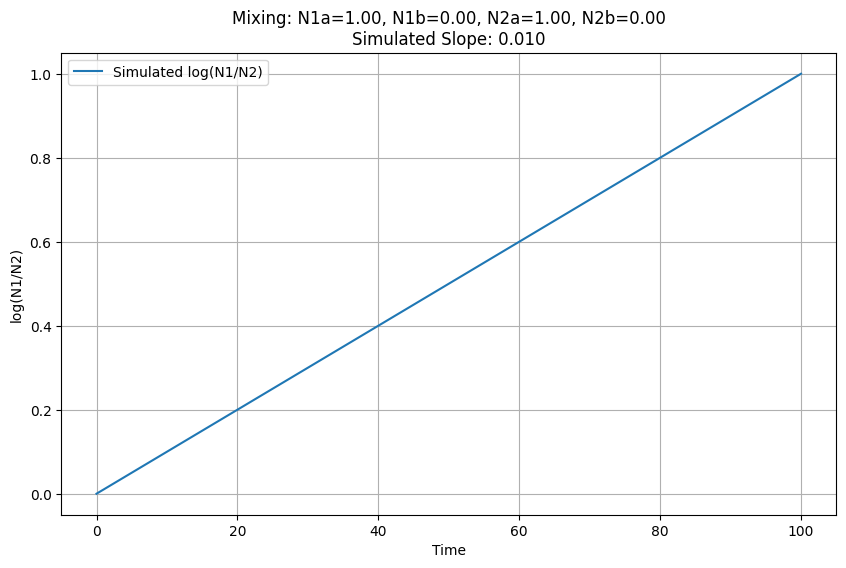

,Mixing Proportions,Simulated Slope
0,"{'N1a': 0.0, 'N1b': 1.0, 'N2a': 0.0, 'N2b': 1.0}",0.080000
1,"{'N1a': 0.1, 'N1b': 0.9, 'N2a': 0.1, 'N2b': 0.9}",0.079279
2,"{'N1a': 0.2, 'N1b': 0.8, 'N2a': 0.2, 'N2b': 0.8}",0.078446
3,"{'N1a': 0.30000000000000004, 'N1b': 0.7, 'N2a'...",0.077467
4,"{'N1a': 0.4, 'N1b': 0.6, 'N2a': 0.4, 'N2b': 0.6}",0.076290
5,"{'N1a': 0.5, 'N1b': 0.5, 'N2a': 0.5, 'N2b': 0.5}",0.074832
6,"{'N1a': 0.6000000000000001, 'N1b': 0.399999999...",0.072952
7,"{'N1a': 0.7000000000000001, 'N1b': 0.299999999...",0.070376
8,"{'N1a': 0.8, 'N1b': 0.19999999999999996, 'N2a'...",0.066466
9,"{'N1a': 0.9, 'N1b': 0.09999999999999998, 'N2a'...",0.059132


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Define parameters, region a and b. Variants 1 and 2.
dpgr_1a_2a = 0.01
dpgr_1b_2b = 0.08
g2a = 1.0
g2b = 1.0
g1a = g2a + dpgr_1a_2a
g1b = g2b + dpgr_1b_2b

# Adjustable starting points for populations
initial_values = {
    "N1a": 100,
    "N1b": 100,
    "N2a": 100,
    "N2b": 100,
}

# Possible mixing proportions for each group
mixing_values = np.linspace(0, 1, 11)  # Example: [0.0, 0.1, 0.2, ..., 1.0]

# Shortened time points for simulation
time_points = np.linspace(0, 100, 20)  # 20 time points

# Population growth function
def population_growth(N0, g, t):
    return N0 * np.exp(g * t)

# Store results for all mixing combinations
results = []

# Loop over mixing proportions
for mix_N1a in mixing_values:
    mix_N1b = 1.0 - mix_N1a  # enforce a + b = 1.0
    mix_N2a = mix_N1a  # Enforce that a proportion are the same
    mix_N2b = mix_N1b  # Enforce that b proportions are the same

    # Initialize arrays to store results
    N1a = np.zeros_like(time_points)
    N1b = np.zeros_like(time_points)
    N2a = np.zeros_like(time_points)
    N2b = np.zeros_like(time_points)
    N1 = np.zeros_like(time_points)
    N2 = np.zeros_like(time_points)
    log_ratio_N1_N2 = np.zeros_like(time_points)

    # Simulate population growth
    for i, t in enumerate(time_points):
        N1a[i] = population_growth(initial_values["N1a"], g1a, t)
        N1b[i] = population_growth(initial_values["N1b"], g1b, t)
        N2a[i] = population_growth(initial_values["N2a"], g2a, t)
        N2b[i] = population_growth(initial_values["N2b"], g2b, t)

        # Apply mixing proportions
        N1[i] = mix_N1a * N1a[i] + mix_N1b * N1b[i]
        N2[i] = mix_N2a * N2a[i] + mix_N2b * N2b[i]

        log_ratio_N1_N2[i] = np.log(N1[i] / N2[i])

    # Calculate slope
    simulated_slope, _ = np.polyfit(time_points, log_ratio_N1_N2, 1)

    # Store results for this combination
    results.append({
        "Mixing Proportions": {
            "N1a": mix_N1a,
            "N1b": mix_N1b,
            "N2a": mix_N2a,
            "N2b": mix_N2b,
        },
        "Simulated Slope": simulated_slope,
    })

    # Plot for each combination
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, log_ratio_N1_N2, label="Simulated log(N1/N2)")
    plt.xlabel("Time")
    plt.ylabel("log(N1/N2)")
    plt.title(
        f"Mixing: N1a={mix_N1a:.2f}, N1b={mix_N1b:.2f}, N2a={mix_N2a:.2f}, N2b={mix_N2b:.2f}\n"
        f"Simulated Slope: {simulated_slope:.3f}"
    )
    plt.legend()
    plt.grid(True)
    plt.show()

# Display results summary
import pandas as pd
results_df = pd.DataFrame(results)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Simulation Results for Mixing Proportions", dataframe=results_df)
results_df

In [43]:
results_df

,Mixing Proportions,Simulated Slope
0,"{'N1a': 0.0, 'N1b': 1.0, 'N2a': 0.0, 'N2b': 1.0}",0.080000
1,"{'N1a': 0.1, 'N1b': 0.9, 'N2a': 0.1, 'N2b': 0.9}",0.079279
2,"{'N1a': 0.2, 'N1b': 0.8, 'N2a': 0.2, 'N2b': 0.8}",0.078446
3,"{'N1a': 0.30000000000000004, 'N1b': 0.7, 'N2a'...",0.077467
4,"{'N1a': 0.4, 'N1b': 0.6, 'N2a': 0.4, 'N2b': 0.6}",0.076290
5,"{'N1a': 0.5, 'N1b': 0.5, 'N2a': 0.5, 'N2b': 0.5}",0.074832
6,"{'N1a': 0.6000000000000001, 'N1b': 0.399999999...",0.072952
7,"{'N1a': 0.7000000000000001, 'N1b': 0.299999999...",0.070376
8,"{'N1a': 0.8, 'N1b': 0.19999999999999996, 'N2a'...",0.066466
9,"{'N1a': 0.9, 'N1b': 0.09999999999999998, 'N2a'...",0.059132


# gpt 5b

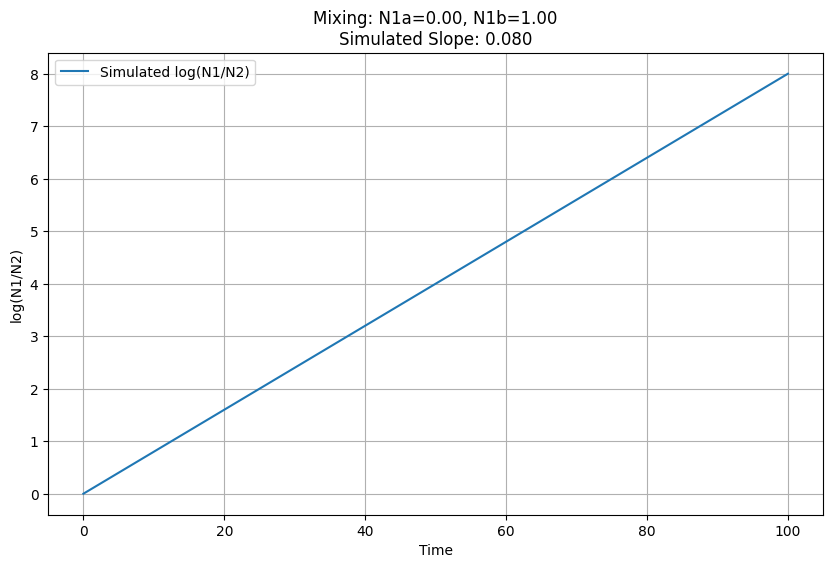

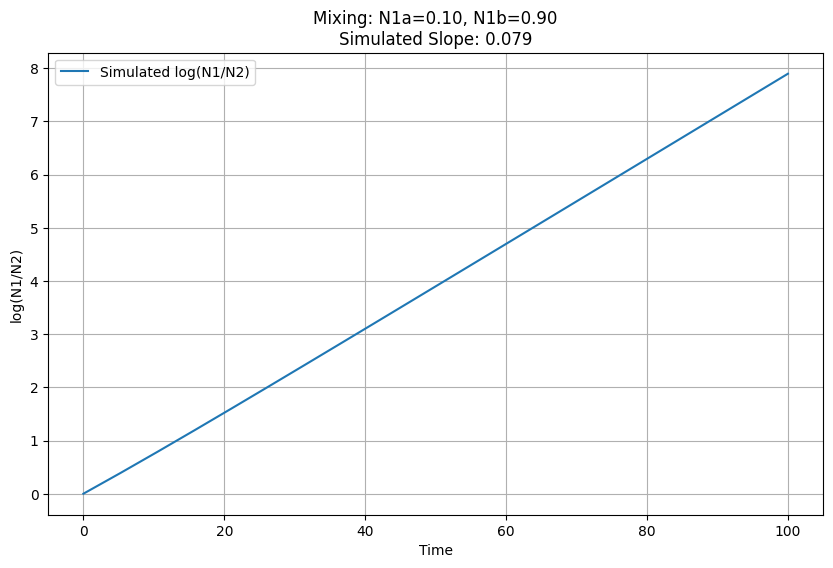

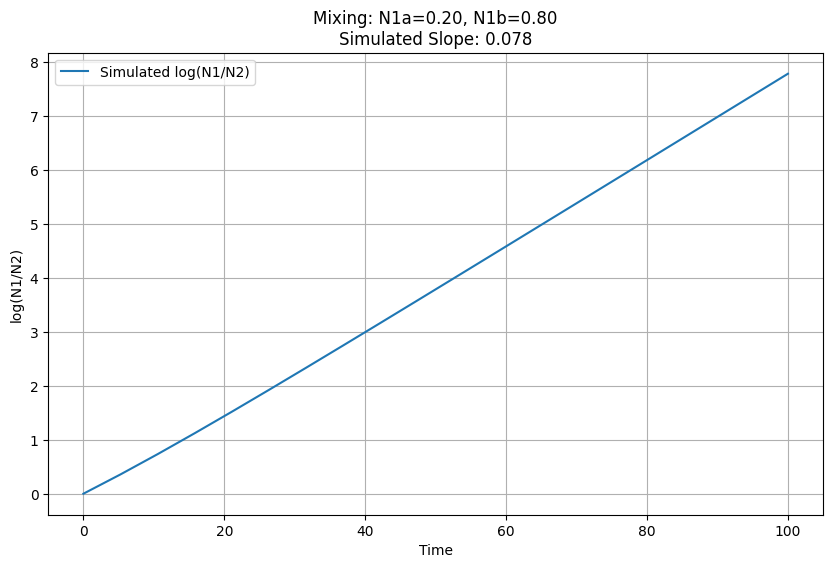

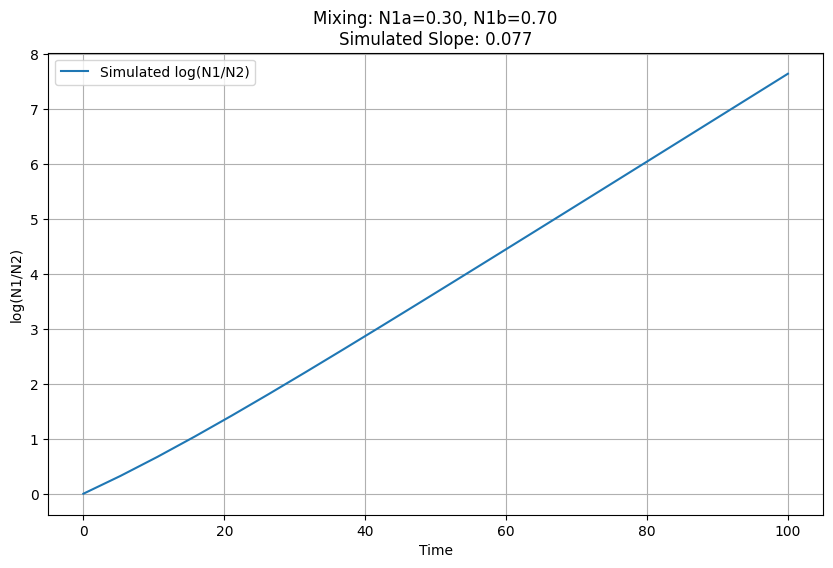

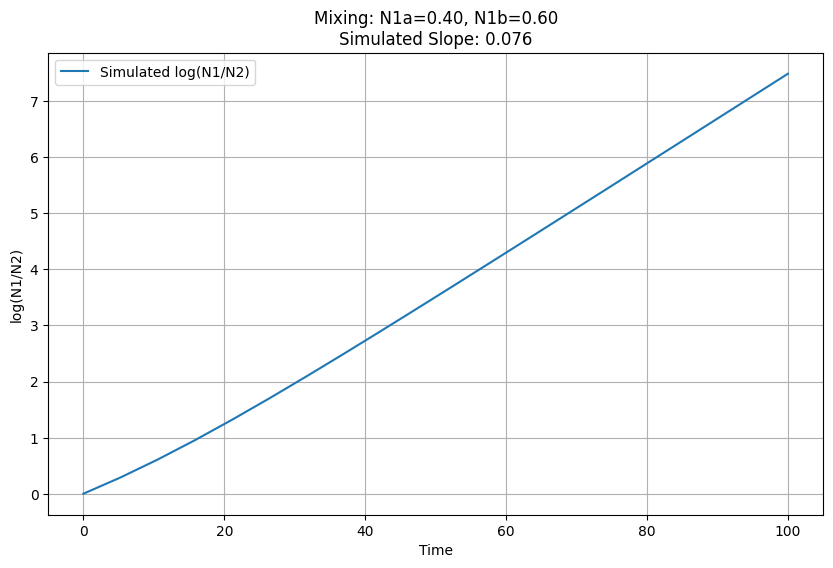

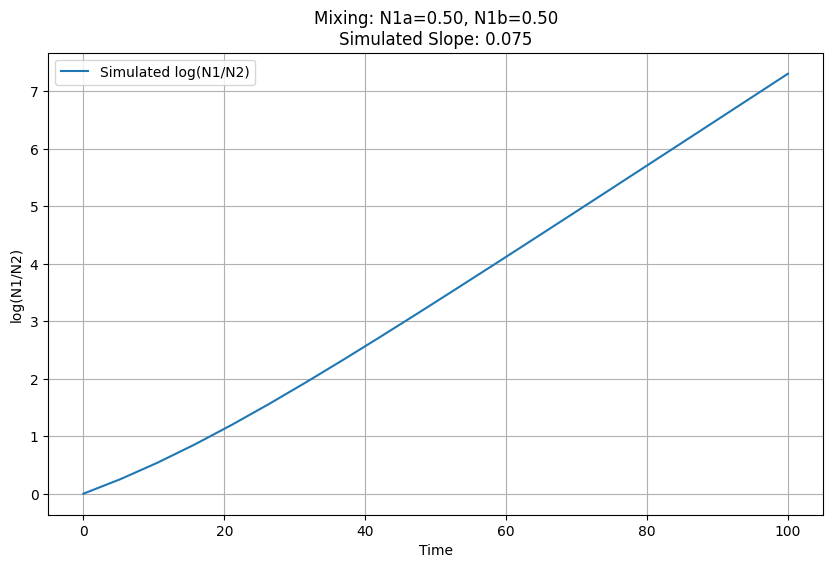

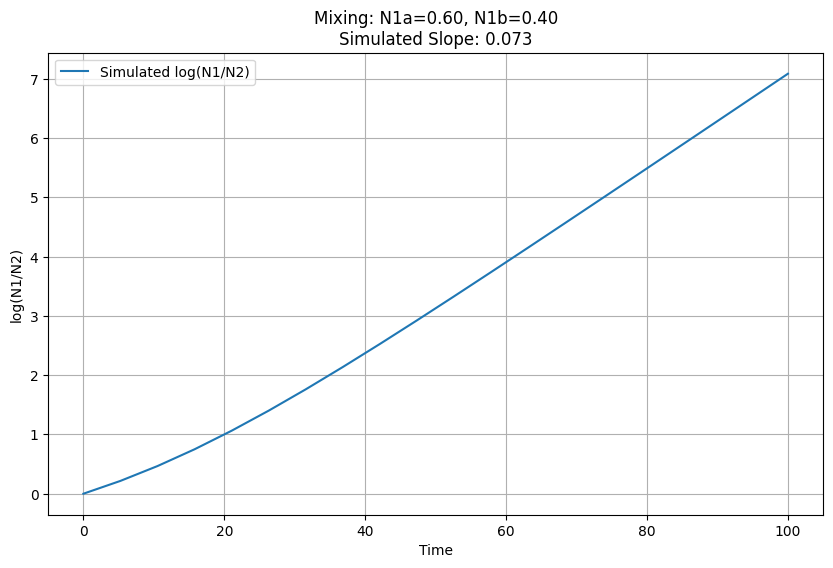

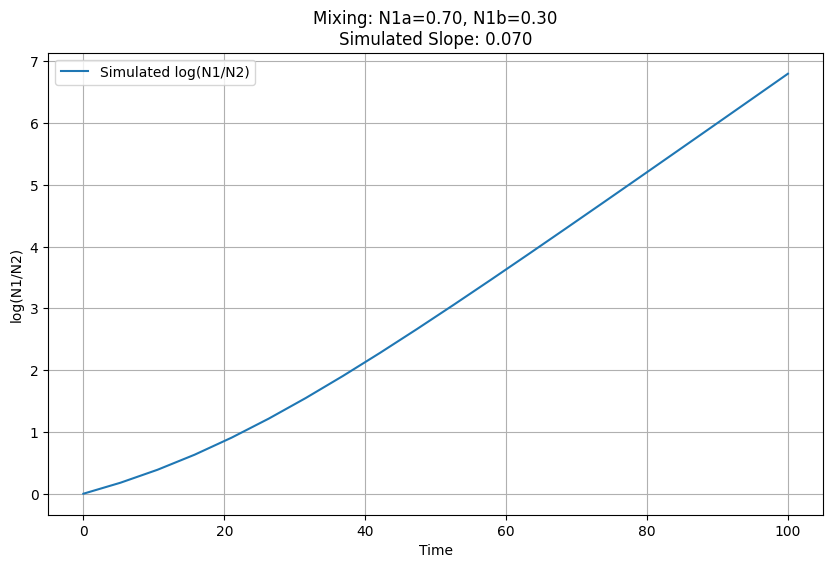

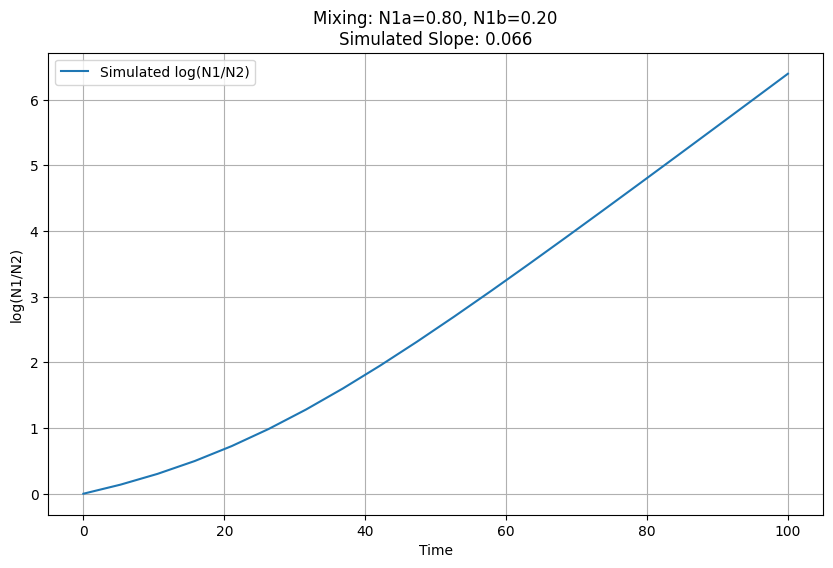

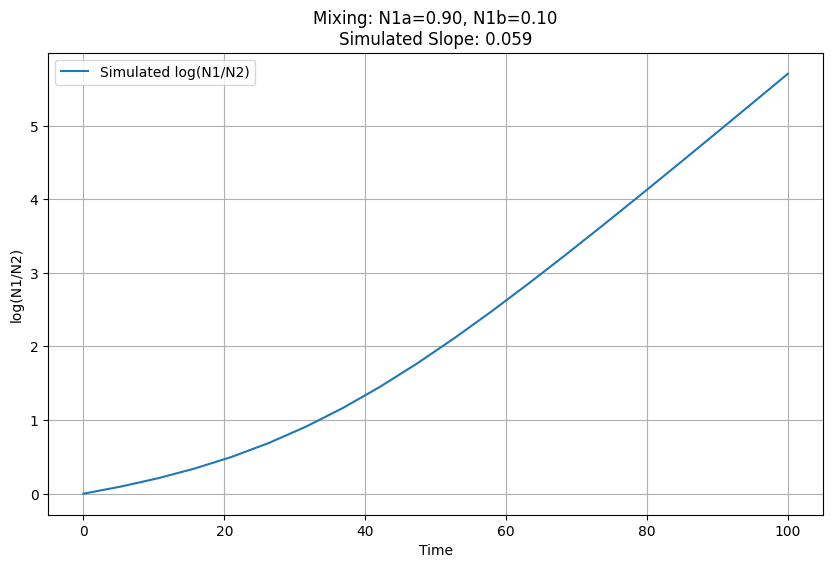

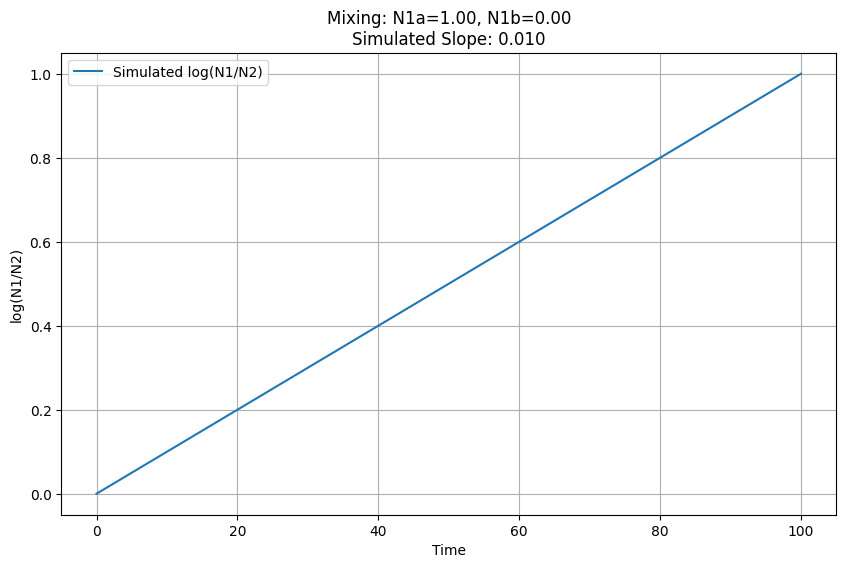

Parsed Simulation Results with Mixing Proportions:
    Mix_N1a  Mix_N1b  Mix_N2a  Mix_N2b  Simulated Slope
0       0.0      1.0      0.0      1.0         0.080000
1       0.1      0.9      0.1      0.9         0.079279
2       0.2      0.8      0.2      0.8         0.078446
3       0.3      0.7      0.3      0.7         0.077467
4       0.4      0.6      0.4      0.6         0.076290
5       0.5      0.5      0.5      0.5         0.074832
6       0.6      0.4      0.6      0.4         0.072952
7       0.7      0.3      0.7      0.3         0.070376
8       0.8      0.2      0.8      0.2         0.066466
9       0.9      0.1      0.9      0.1         0.059132
10      1.0      0.0      1.0      0.0         0.010000


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd

# Define parameters for region a and b, variants 1 and 2
dpgr_1a_2a = 0.01
dpgr_1b_2b = 0.08
g2a = 1.0
g2b = 1.0
g1a = g2a + dpgr_1a_2a
g1b = g2b + dpgr_1b_2b

# Adjustable starting points for populations
initial_values = {
    "N1a": 100,
    "N1b": 100,
    "N2a": 100,
    "N2b": 100,
}

# Possible mixing proportions for each group
mixing_values = np.linspace(0, 1, 11)  # Example: [0.0, 0.1, 0.2, ..., 1.0]

# Shortened time points for simulation
time_points = np.linspace(0, 100, 20)  # 20 time points

# Population growth function
def population_growth(N0, g, t):
    return N0 * np.exp(g * t)

# Store results for all mixing combinations
results = []

# Loop over mixing proportions for locations a and b
for mix_N1a in mixing_values:
    mix_N2a = mix_N1a  # Enforce mix_N1a = mix_N2a
    mix_N1b = 1 - mix_N1a  # Enforce that mix_N1a + mix_N1b = 1
    mix_N2b = mix_N1b  # Enforce mix_N1b = mix_N2b

    # Initialize arrays to store results
    N1a = np.zeros_like(time_points)
    N1b = np.zeros_like(time_points)
    N2a = np.zeros_like(time_points)
    N2b = np.zeros_like(time_points)
    N1 = np.zeros_like(time_points)
    N2 = np.zeros_like(time_points)
    log_ratio_N1_N2 = np.zeros_like(time_points)

    # Simulate population growth
    for i, t in enumerate(time_points):
        N1a[i] = population_growth(initial_values["N1a"], g1a, t)
        N1b[i] = population_growth(initial_values["N1b"], g1b, t)
        N2a[i] = population_growth(initial_values["N2a"], g2a, t)
        N2b[i] = population_growth(initial_values["N2b"], g2b, t)

        # Apply mixing proportions
        N1[i] = mix_N1a * N1a[i] + mix_N1b * N1b[i]
        N2[i] = mix_N2a * N2a[i] + mix_N2b * N2b[i]

        log_ratio_N1_N2[i] = np.log(N1[i] / N2[i])

    # Calculate slope
    simulated_slope, _ = np.polyfit(time_points, log_ratio_N1_N2, 1)

    # Store results for this combination
    results.append({
        "Mix_N1a": mix_N1a,
        "Mix_N1b": mix_N1b,
        "Mix_N2a": mix_N2a,
        "Mix_N2b": mix_N2b,
        "Simulated Slope": simulated_slope,
    })

    # Plot for each combination
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, log_ratio_N1_N2, label="Simulated log(N1/N2)")
    plt.xlabel("Time")
    plt.ylabel("log(N1/N2)")
    plt.title(
        f"Mixing: N1a={mix_N1a:.2f}, N1b={mix_N1b:.2f}\n"
        f"Simulated Slope: {simulated_slope:.3f}"
    )
    plt.legend()
    plt.grid(True)
    plt.show()

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file for further analysis
results_df.to_csv("simulation_results.csv", index=False)

# Display the parsed DataFrame
print("Parsed Simulation Results with Mixing Proportions:")
print(results_df)


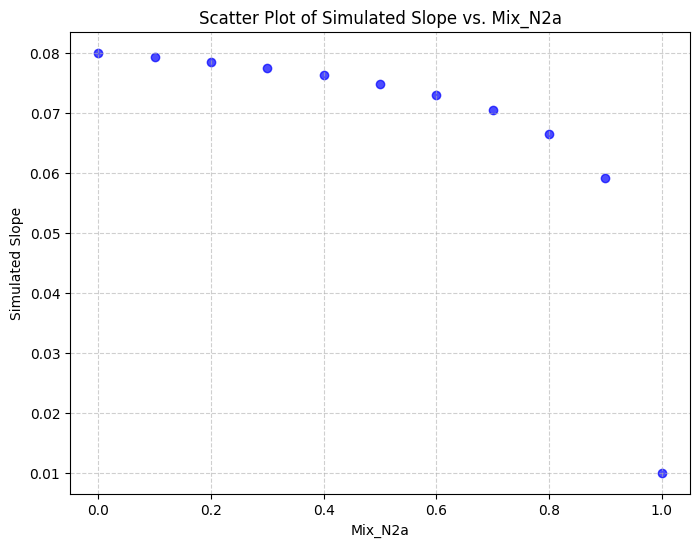

In [49]:
# Create a scatter plot of Simulated Slope vs. Mix_N2a
plt.figure(figsize=(8, 6))
plt.scatter(results_df["Mix_N2a"], results_df["Simulated Slope"], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel("Mix_N2a")
plt.ylabel("Simulated Slope")
plt.title("Scatter Plot of Simulated Slope vs. Mix_N2a")

# Show grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

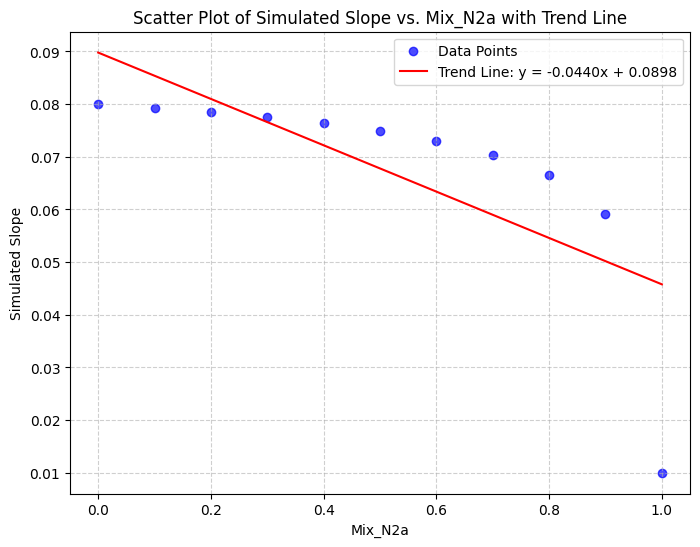

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot of Simulated Slope vs. Mix_N2a
plt.figure(figsize=(8, 6))
plt.scatter(results_df["Mix_N2a"], results_df["Simulated Slope"], color='blue', alpha=0.7, label='Data Points')

# Fit a linear regression line (trend line)
coefficients = np.polyfit(results_df["Mix_N2a"], results_df["Simulated Slope"], 1)
trend_line = np.poly1d(coefficients)

# Plot the trend line
x_vals = np.linspace(results_df["Mix_N2a"].min(), results_df["Mix_N2a"].max(), 100)
plt.plot(x_vals, trend_line(x_vals), color='red', label=f'Trend Line: y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}')

# Add labels and title
plt.xlabel("Mix_N2a")
plt.ylabel("Simulated Slope")
plt.title("Scatter Plot of Simulated Slope vs. Mix_N2a with Trend Line")

# Add legend
plt.legend()

# Show grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


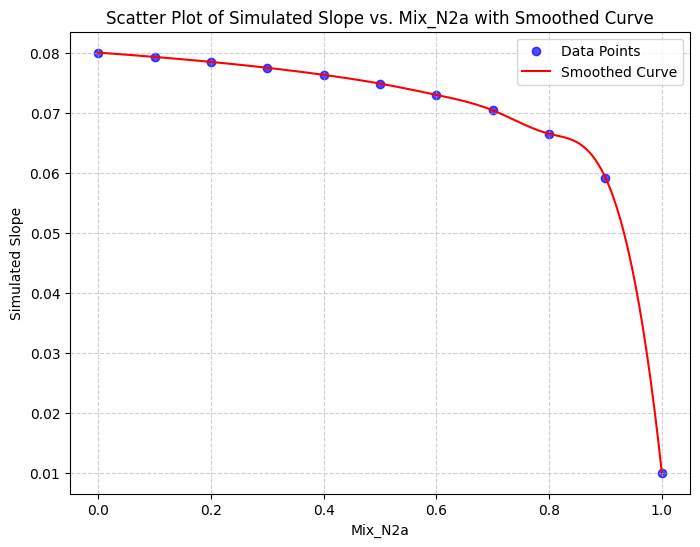

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Create a scatter plot of Simulated Slope vs. Mix_N2a
plt.figure(figsize=(8, 6))
plt.scatter(results_df["Mix_N2a"], results_df["Simulated Slope"], color='blue', alpha=0.7, label="Data Points")

# Add a smoothed curve
x = results_df["Mix_N2a"]
y = results_df["Simulated Slope"]

# Interpolation for a smooth curve
x_smooth = np.linspace(x.min(), x.max(), 300)  # More points for smooth curve
y_smooth = make_interp_spline(x, y)(x_smooth)

# Plot the smoothed curve
plt.plot(x_smooth, y_smooth, color='red', label="Smoothed Curve")

# Add labels and title
plt.xlabel("Mix_N2a")
plt.ylabel("Simulated Slope")
plt.title("Scatter Plot of Simulated Slope vs. Mix_N2a with Smoothed Curve")

# Show legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


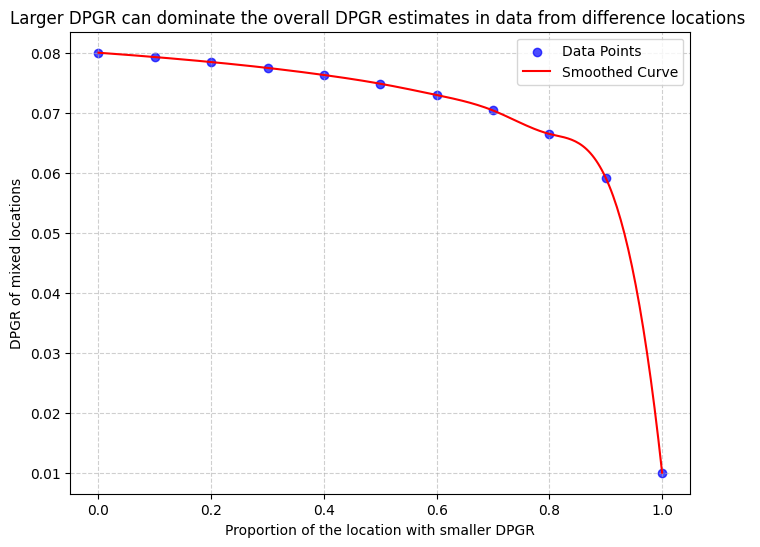

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Create a scatter plot of Simulated Slope vs. Mix_N2a
plt.figure(figsize=(8, 6))
plt.scatter(results_df["Mix_N2a"], results_df["Simulated Slope"], color='blue', alpha=0.7, label="Data Points")

# Add a smoothed curve
x = results_df["Mix_N2a"]
y = results_df["Simulated Slope"]

# Interpolation for a smooth curve
x_smooth = np.linspace(x.min(), x.max(), 300)  # More points for smooth curve
y_smooth = make_interp_spline(x, y)(x_smooth)

# Plot the smoothed curve
plt.plot(x_smooth, y_smooth, color='red', label="Smoothed Curve")

# Add updated labels and title
plt.xlabel("Proportion of the location with smaller DPGR")
plt.ylabel("DPGR of mixed locations")
plt.title("Larger DPGR can dominate the overall DPGR estimates in data from difference locations ")

# Show legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()
